In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ticker = ['PTT.BK']
data = yf.download(tickers=ticker,start='2021-01-01', end='2022-09-01',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600
2021-01-05,42.25,42.50,41.25,42.00,37.752186,75867500
2021-01-06,43.00,43.50,42.50,42.75,38.426331,88565400
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900
2021-01-08,42.75,43.50,42.00,42.75,38.426331,83698400
...,...,...,...,...,...,...
2022-08-25,37.75,38.00,37.50,37.75,36.414627,42514900
2022-08-26,37.75,38.00,37.50,38.00,36.655781,35083300
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600


In [7]:
data.iloc[-365:]['High'].max()

42.5

In [4]:
data.iloc[-252:]['High'].max()

41.25

In [17]:
data.index[-241]

Timestamp('2021-09-01 00:00:00')

In [6]:
data.iloc[-1]

Open         3.775000e+01
High         3.775000e+01
Low          3.725000e+01
Close        3.750000e+01
Adj Close    3.617347e+01
Volume       7.663620e+07
Name: 2022-08-31 00:00:00, dtype: float64

In [18]:
data.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2022-08-18', '2022-08-19', '2022-08-22', '2022-08-23',
               '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29',
               '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', name='Date', length=400, freq=None)

In [19]:
data.index[-1]

Timestamp('2022-08-31 00:00:00')

In [20]:
data.index[-1]-pd.DateOffset(years=1)

Timestamp('2021-08-31 00:00:00')

In [22]:
# inset datetime in data frame 
pd.to_datetime('2022-08-31') - pd.DateOffset(years=1)

Timestamp('2021-08-31 00:00:00')

In [21]:
data[data.index == (data.index[-1]-pd.DateOffset(years=1))]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-31,38.5,38.75,38.0,38.25,35.083118,98277700


In [23]:
data.loc['2021-08-30':]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-30,38.00,38.75,38.00,38.75,35.541718,97994200
2021-08-31,38.50,38.75,38.00,38.25,35.083118,98277700
2021-09-01,38.25,38.50,37.50,37.50,34.395210,83087800
2021-09-02,37.50,38.25,37.25,38.00,34.853813,53803000
2021-09-03,38.25,38.50,37.75,38.25,35.083118,49420400
...,...,...,...,...,...,...
2022-08-25,37.75,38.00,37.50,37.75,36.414627,42514900
2022-08-26,37.75,38.00,37.50,38.00,36.655781,35083300
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600


In [24]:
st = pd.to_datetime('2022-08-31') - pd.DateOffset(weeks=52)
st

Timestamp('2021-09-01 00:00:00')

In [25]:
data.loc[st:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,38.25,38.50,37.50,37.50,34.395210,83087800
2021-09-02,37.50,38.25,37.25,38.00,34.853813,53803000
2021-09-03,38.25,38.50,37.75,38.25,35.083118,49420400
2021-09-06,38.00,38.25,37.50,38.00,34.853813,28381900
2021-09-07,37.75,38.25,37.50,37.50,34.395210,75256800
...,...,...,...,...,...,...
2022-08-25,37.75,38.00,37.50,37.75,36.414627,42514900
2022-08-26,37.75,38.00,37.50,38.00,36.655781,35083300
2022-08-29,37.50,37.75,37.00,37.50,36.173470,64898600


In [29]:
data.loc[st:]['High'].max()

41.25

In [30]:
data.loc[st:]['Low'].min()

32.75

In [37]:
data.loc['2022-09-01':]['High'].max()

nan

In [38]:
max_week = data.loc['2021-08-31':]['High'].max()
min_week = data.loc['2021-08-31':]['Low'].min()

In [39]:
data['Close'][-1]/max_week -1

-0.09090909090909094

In [40]:
data['Close'][-1]/min_week -1

0.1450381679389312

current - min / max - min

In [42]:
range_week = max_week - min_week # range = max -min

In [44]:
(data.Close[-1]-min_week)/range_week

0.5588235294117647

<AxesSubplot:xlabel='Date'>

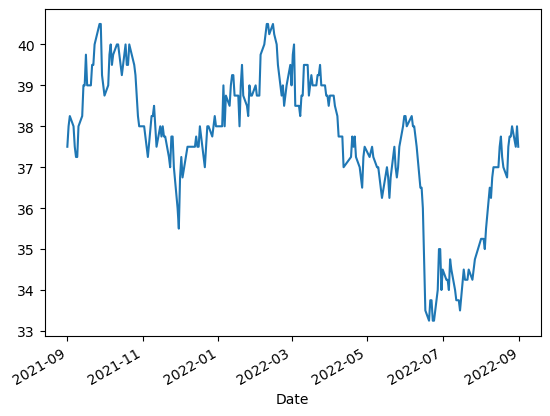

In [45]:
data[st:].Close.plot()

In [46]:
ticker = ['PTT.BK','KBANK.BK','BBL.BK','OR.BK','SPY']
data2 = yf.download(tickers=ticker,start='2021-01-01', end='2022-08-31',interval='1d')

[*********************100%***********************]  5 of 5 completed


In [47]:
data2['2021-08-31':].High.max()

BBL.BK      149.000000
KBANK.BK    175.000000
OR.BK        30.500000
PTT.BK       41.250000
SPY         479.980011
dtype: float64

In [48]:
data2.index[-1]

Timestamp('2022-08-30 00:00:00')

In [49]:
st = data2.index[-1] - pd.DateOffset(years=1)

data2.High.loc[st:]

,BBL.BK,KBANK.BK,OR.BK,PTT.BK,SPY
Date,,,,,
2021-08-30,119.5,126.0,30.25,38.75,453.070007
2021-08-31,118.0,124.0,30.50,38.75,452.489990
2021-09-01,115.5,123.0,30.50,38.50,453.109985
2021-09-02,114.5,123.5,30.00,38.25,454.049988
2021-09-03,114.5,124.0,29.75,38.50,453.630005
...,...,...,...,...,...
2022-08-24,138.0,157.0,26.75,38.25,415.109985
2022-08-25,139.0,158.0,27.25,38.00,419.559998
2022-08-26,140.5,158.5,27.25,38.00,419.959991


In [50]:
data2.High.loc[st:].max()

BBL.BK      149.000000
KBANK.BK    175.000000
OR.BK        30.500000
PTT.BK       41.250000
SPY         479.980011
dtype: float64

In [51]:
data2.Low.loc[st:].min()

BBL.BK      111.000000
KBANK.BK    117.000000
OR.BK        23.799999
PTT.BK       32.750000
SPY         362.170013
dtype: float64

<AxesSubplot:xlabel='Date'>

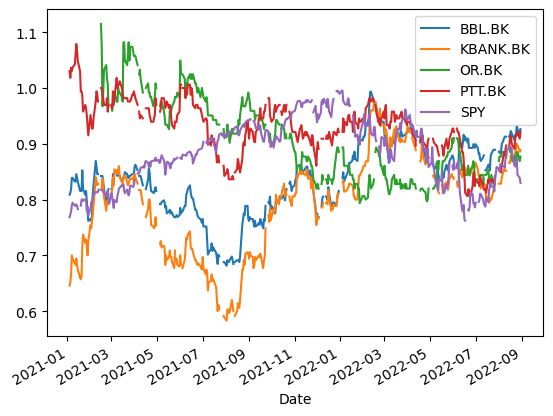

In [53]:
(data2.Close /data2.High.loc[st:].max()).plot()

# but cannot use that right now 

# What if no last 1 year

In [54]:
data.asfreq('D').head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0
2021-01-05,42.25,42.50,41.25,42.00,37.752186,75867500.0
2021-01-06,43.00,43.50,42.50,42.75,38.426331,88565400.0
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900.0
2021-01-08,42.75,43.50,42.00,42.75,38.426331,83698400.0
2021-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-11,42.75,43.00,42.50,43.00,38.651051,45553200.0
2021-01-12,43.00,44.00,42.50,43.75,39.325191,101081900.0


In [55]:
st = pd.to_datetime('2022-01-09')-pd.DateOffset(years=1)

In [63]:
data.High.loc[st:'2022-01-09']

Date
2021-01-11    43.00
2021-01-12    44.00
2021-01-13    45.00
2021-01-14    44.75
2021-01-15    44.75
              ...  
2021-12-30    38.50
2022-01-04    38.50
2022-01-05    39.00
2022-01-06    39.00
2022-01-07    38.75
Name: High, Length: 240, dtype: float64

In [57]:
df = data.asfreq('D').fillna(method='ffill')

In [59]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,41.00,42.75,40.75,42.50,38.201614,74638600.0
2021-01-05,42.25,42.50,41.25,42.00,37.752186,75867500.0
2021-01-06,43.00,43.50,42.50,42.75,38.426331,88565400.0
2021-01-07,43.00,43.25,42.25,42.50,38.201614,63128900.0
2021-01-08,42.75,43.50,42.00,42.75,38.426331,83698400.0
2021-01-09,42.75,43.50,42.00,42.75,38.426331,83698400.0
2021-01-10,42.75,43.50,42.00,42.75,38.426331,83698400.0
2021-01-11,42.75,43.00,42.50,43.00,38.651051,45553200.0
2021-01-12,43.00,44.00,42.50,43.75,39.325191,101081900.0


In [60]:
st = pd.to_datetime('2022-01-09') - pd.DateOffset(years=1)

df.High.loc[st:'2022-01-09']

Date
2021-01-09    43.50
2021-01-10    43.50
2021-01-11    43.00
2021-01-12    44.00
2021-01-13    45.00
              ...  
2022-01-05    39.00
2022-01-06    39.00
2022-01-07    38.75
2022-01-08    38.75
2022-01-09    38.75
Freq: D, Name: High, Length: 366, dtype: float64

In [61]:
df.High.loc[st:].max()

# 1 year pass high

45.0

In [62]:
df.Low.loc[st:].min()

# 1 year pass low

32.75

In [65]:
df2=data2.copy()
df2

Adj Close                                                Close  \
                BBL.BK    KBANK.BK      OR.BK     PTT.BK         SPY BBL.BK   
Date                                                                          
2021-01-04  113.696449  108.156883        NaN  38.201618  358.128723  120.5   
2021-01-05  114.168221  109.114029        NaN  37.752186  360.595276  121.0   
2021-01-06  115.111755  111.506874        NaN  38.426331  362.751068  122.0   
2021-01-07  117.942368  117.249725        NaN  38.201618  368.140656  125.0   
2021-01-08  117.942368  116.292587        NaN  38.426331  370.238251  125.0   
...                ...         ...        ...        ...         ...    ...   
2022-08-24  135.005478  155.483444  26.156483  36.414627  410.094513  136.5   
2022-08-25  137.478104  156.978470  26.650002  36.414627  415.884033  139.0   
2022-08-26  136.489059  156.480133  26.650002  36.655781  401.806763  138.0   
2022-08-29  135.500000  154.486755  26.156483  36.173470  399.149933  137.0   
2022-08-30  136.489059  154.985092  26.403242  36.655781  394.768127  138.0   

                                               ...   Open                  \
           KBANK.BK  OR.BK PTT.BK         SPY  ... BBL.BK KBANK.BK  OR.BK   
Date                                           ...                          
2021-01-04    113.0    NaN  42.50  368.790009  ...  115.5    110.0    NaN   
2021-01-05    114.0    NaN  42.00  371.329987  ...  119.5    113.0    NaN   
2021-01-06    116.5    NaN  42.75  373.549988  ...  121.5    115.0    NaN   
2021-01-07    122.5    NaN  42.50  379.100006  ...  126.0    123.0    NaN   
2021-01-08    121.5    NaN  42.75  381.260010  ...  127.0    123.5    NaN   
...             ...    ...    ...         ...  ...    ...      ...    ...   
2022-08-24    156.0  26.50  37.75  413.670013  ...  137.0    155.0  26.50   
2022-08-25    157.5  27.00  37.75  419.510010  ...  137.5    157.0  26.75   
2022-08-26    157.0  27.00  38.00  405.309998  ...  139.0    157.5  27.25   
2022-08-29    155.0  26.50  37.50  402.630005  ...  136.5    154.5  26.75   
2022-08-30    155.5  26.75  38.00  398.209991  ...  137.5    155.0  26.75   

                                   Volume                                      \
           PTT.BK         SPY      BBL.BK    KBANK.BK       OR.BK      PTT.BK   
Date                                                                            
2021-01-04  41.00  375.309998   6832500.0  21941800.0         NaN  74638600.0   
2021-01-05  42.25  368.100006   8378700.0  16063700.0         NaN  75867500.0   
2021-01-06  43.00  369.709991  13477400.0  42352500.0         NaN  88565400.0   
2021-01-07  43.00  376.100006  17236400.0  45568300.0         NaN  63128900.0   
2021-01-08  42.75  380.589996   8731400.0  22647800.0         NaN  83698400.0   
...           ...         ...         ...         ...         ...         ...   
2022-08-24  37.75  412.109985   7638400.0  21238500.0  18045300.0  96869700.0   
2022-08-25  37.75  415.239990  12030600.0  18704900.0  38954300.0  42514900.0   
2022-08-26  37.75  419.390015  13296900.0  26521800.0  17659600.0  35083300.0   
2022-08-29  37.50  402.200012   4782500.0  20463100.0  14160800.0  64898600.0   
2022-08-30  37.50  403.850006   2075300.0  23149500.0  12384600.0  49033400.0   

                         
                    SPY  
Date                     
2021-01-04  110210800.0  
2021-01-05   66426200.0  
2021-01-06  107997700.0  
2021-01-07   68766800.0  
2021-01-08   71677200.0  
...                 ...  
2022-08-24   49177800.0  
2022-08-25   50942300.0  
2022-08-26  103087000.0  
2022-08-29   65370800.0  
2022-08-30   85652400.0  

[431 rows x 30 columns]

In [67]:
df2.High.asfreq('D')

,BBL.BK,KBANK.BK,OR.BK,PTT.BK,SPY
Date,,,,,
2021-01-04,120.5,113.0,NaN,42.75,375.450012
2021-01-05,121.0,114.5,NaN,42.50,372.500000
2021-01-06,125.0,120.0,NaN,43.50,376.980011
2021-01-07,127.0,123.0,NaN,43.25,379.899994
2021-01-08,127.5,124.0,NaN,43.50,381.489990
...,...,...,...,...,...
2022-08-26,140.5,158.5,27.25,38.00,419.959991
2022-08-27,NaN,NaN,NaN,NaN,NaN
2022-08-28,NaN,NaN,NaN,NaN,NaN


In [68]:
df2.High.max()

BBL.BK      149.000000
KBANK.BK    175.000000
OR.BK        36.500000
PTT.BK       45.000000
SPY         479.980011
dtype: float64

In [69]:
df2.Low.max()

BBL.BK      145.000000
KBANK.BK    169.000000
OR.BK        32.250000
PTT.BK       44.000000
SPY         476.059998
dtype: float64

In [70]:
df2 = data2.copy()
df2

Adj Close                                                Close  \
                BBL.BK    KBANK.BK      OR.BK     PTT.BK         SPY BBL.BK   
Date                                                                          
2021-01-04  113.696449  108.156883        NaN  38.201618  358.128723  120.5   
2021-01-05  114.168221  109.114029        NaN  37.752186  360.595276  121.0   
2021-01-06  115.111755  111.506874        NaN  38.426331  362.751068  122.0   
2021-01-07  117.942368  117.249725        NaN  38.201618  368.140656  125.0   
2021-01-08  117.942368  116.292587        NaN  38.426331  370.238251  125.0   
...                ...         ...        ...        ...         ...    ...   
2022-08-24  135.005478  155.483444  26.156483  36.414627  410.094513  136.5   
2022-08-25  137.478104  156.978470  26.650002  36.414627  415.884033  139.0   
2022-08-26  136.489059  156.480133  26.650002  36.655781  401.806763  138.0   
2022-08-29  135.500000  154.486755  26.156483  36.173470  399.149933  137.0   
2022-08-30  136.489059  154.985092  26.403242  36.655781  394.768127  138.0   

                                               ...   Open                  \
           KBANK.BK  OR.BK PTT.BK         SPY  ... BBL.BK KBANK.BK  OR.BK   
Date                                           ...                          
2021-01-04    113.0    NaN  42.50  368.790009  ...  115.5    110.0    NaN   
2021-01-05    114.0    NaN  42.00  371.329987  ...  119.5    113.0    NaN   
2021-01-06    116.5    NaN  42.75  373.549988  ...  121.5    115.0    NaN   
2021-01-07    122.5    NaN  42.50  379.100006  ...  126.0    123.0    NaN   
2021-01-08    121.5    NaN  42.75  381.260010  ...  127.0    123.5    NaN   
...             ...    ...    ...         ...  ...    ...      ...    ...   
2022-08-24    156.0  26.50  37.75  413.670013  ...  137.0    155.0  26.50   
2022-08-25    157.5  27.00  37.75  419.510010  ...  137.5    157.0  26.75   
2022-08-26    157.0  27.00  38.00  405.309998  ...  139.0    157.5  27.25   
2022-08-29    155.0  26.50  37.50  402.630005  ...  136.5    154.5  26.75   
2022-08-30    155.5  26.75  38.00  398.209991  ...  137.5    155.0  26.75   

                                   Volume                                      \
           PTT.BK         SPY      BBL.BK    KBANK.BK       OR.BK      PTT.BK   
Date                                                                            
2021-01-04  41.00  375.309998   6832500.0  21941800.0         NaN  74638600.0   
2021-01-05  42.25  368.100006   8378700.0  16063700.0         NaN  75867500.0   
2021-01-06  43.00  369.709991  13477400.0  42352500.0         NaN  88565400.0   
2021-01-07  43.00  376.100006  17236400.0  45568300.0         NaN  63128900.0   
2021-01-08  42.75  380.589996   8731400.0  22647800.0         NaN  83698400.0   
...           ...         ...         ...         ...         ...         ...   
2022-08-24  37.75  412.109985   7638400.0  21238500.0  18045300.0  96869700.0   
2022-08-25  37.75  415.239990  12030600.0  18704900.0  38954300.0  42514900.0   
2022-08-26  37.75  419.390015  13296900.0  26521800.0  17659600.0  35083300.0   
2022-08-29  37.50  402.200012   4782500.0  20463100.0  14160800.0  64898600.0   
2022-08-30  37.50  403.850006   2075300.0  23149500.0  12384600.0  49033400.0   

                         
                    SPY  
Date                     
2021-01-04  110210800.0  
2021-01-05   66426200.0  
2021-01-06  107997700.0  
2021-01-07   68766800.0  
2021-01-08   71677200.0  
...                 ...  
2022-08-24   49177800.0  
2022-08-25   50942300.0  
2022-08-26  103087000.0  
2022-08-29   65370800.0  
2022-08-30   85652400.0  

[431 rows x 30 columns]

In [71]:
df2 = df2.High.asfreq('D').fillna(method='ffill')

In [72]:
st = df2.index[-1] - pd.DateOffset(weeks =52)

In [73]:
df2.loc[st:].max()

# High week

BBL.BK      149.000000
KBANK.BK    175.000000
OR.BK        30.500000
PTT.BK       41.250000
SPY         479.980011
dtype: float64

In [74]:
data2.Low.loc[st:].min()

# Low week

BBL.BK      111.000000
KBANK.BK    117.000000
OR.BK        23.799999
PTT.BK       32.750000
SPY         362.170013
dtype: float64

In [77]:
ticker = ['KBANK.BK','BBL.BK','KTB.BK','KKP.BK']
data = yf.download(tickers=ticker,start='2021-01-01', end='2022-09-01',interval='1d')

[*********************100%***********************]  4 of 4 completed


In [78]:
data

Adj Close                                    Close           \
                BBL.BK    KBANK.BK     KKP.BK     KTB.BK BBL.BK KBANK.BK   
Date                                                                       
2021-01-04  113.696449  108.156883  46.288147  10.595186  120.5    113.0   
2021-01-05  114.168221  109.114021  46.512840  10.689787  121.0    114.0   
2021-01-06  115.111748  111.506882  48.310440  10.784386  122.0    116.5   
2021-01-07  117.942375  117.249718  50.557434  11.541185  125.0    122.5   
2021-01-08  117.942375  116.292580  49.883339  12.108785  125.0    121.5   
...                ...         ...        ...        ...    ...      ...   
2022-08-25  137.478104  156.978470  69.256142  16.600000  139.0    157.5   
2022-08-26  136.489059  156.480133  69.256142  16.600000  138.0    157.0   
2022-08-29  135.500000  154.486755  69.743858  16.600000  137.0    155.0   
2022-08-30  136.489059  154.985092  70.231583  16.700001  138.0    155.5   
2022-08-31  135.500000  152.991714  70.719299  16.900000  137.0    153.5   

                               High           ...    Low              Open  \
           KKP.BK     KTB.BK BBL.BK KBANK.BK  ... KKP.BK     KTB.BK BBL.BK   
Date                                          ...                            
2021-01-04  51.50  11.200000  120.5    113.0  ...  50.00  10.700000  115.5   
2021-01-05  51.75  11.300000  121.0    114.5  ...  51.25  11.100000  119.5   
2021-01-06  53.75  11.400000  125.0    120.0  ...  52.00  11.200000  121.5   
2021-01-07  56.25  12.200000  127.0    123.0  ...  55.00  11.800000  126.0   
2021-01-08  55.50  12.800000  127.5    124.0  ...  55.25  12.400000  127.0   
...           ...        ...    ...      ...  ...    ...        ...    ...   
2022-08-25  71.00  16.600000  139.0    158.0  ...  70.75  16.500000  137.5   
2022-08-26  71.00  16.600000  140.5    158.5  ...  71.00  16.500000  139.0   
2022-08-29  71.50  16.600000  138.0    156.0  ...  69.75  16.299999  136.5   
2022-08-30  72.00  16.700001  138.0    156.5  ...  71.25  16.500000  137.5   
2022-08-31  72.50  16.900000  138.0    156.0  ...  71.50  16.600000  137.0   

                                     Volume                                 
           KBANK.BK KKP.BK KTB.BK    BBL.BK  KBANK.BK    KKP.BK     KTB.BK  
Date                                                                        
2021-01-04    110.0  50.25   10.8   6832500  21941800   4950900   67646800  
2021-01-05    113.0  51.50   11.1   8378700  16063700   4801400   25391600  
2021-01-06    115.0  52.50   11.3  13477400  42352500  16984200   63059400  
2021-01-07    123.0  55.75   12.0  17236400  45568300  18922100  110486000  
2021-01-08    123.5  56.75   12.4   8731400  22647800  13419200  160152400  
...             ...    ...    ...       ...       ...       ...        ...  
2022-08-25    157.0  71.00   16.6  12030600  18704900   5769600   72909200  
2022-08-26    157.5  71.25   16.6  13296900  26521800   5989500   41255800  
2022-08-29    154.5  70.00   16.4   4782500  20463100   4342100   29392000  
2022-08-30    155.0  71.25   16.5   2075300  23149500   6850800   24516300  
2022-08-31    155.5  72.00   16.6   6594700  82612000   4354200   52241200  

[400 rows x 24 columns]

In [97]:
df2 = data.asfreq('D').fillna(method='ffill').copy()

In [98]:
start=df2.index[-1]-pd.DateOffset(weeks=52)
df2.loc[st:]

# this is data frame 1 year

Adj Close                                    Close           \
                BBL.BK    KBANK.BK     KKP.BK     KTB.BK BBL.BK KBANK.BK   
Date                                                                       
2021-08-31  109.714714  119.916550  52.518715  10.848000  114.0    123.0   
2021-09-01  109.233513  118.454155  52.051888  10.751143  113.5    121.5   
2021-09-02  110.195915  120.404022  52.051888  10.751143  114.5    123.5   
2021-09-03  109.714714  119.429085  51.585049  10.848000  114.0    122.5   
2021-09-04  109.714714  119.429085  51.585049  10.848000  114.0    122.5   
...                ...         ...        ...        ...    ...      ...   
2022-08-27  136.489059  156.480133  69.256142  16.600000  138.0    157.0   
2022-08-28  136.489059  156.480133  69.256142  16.600000  138.0    157.0   
2022-08-29  135.500000  154.486755  69.743858  16.600000  137.0    155.0   
2022-08-30  136.489059  154.985092  70.231583  16.700001  138.0    155.5   
2022-08-31  135.500000  152.991714  70.719299  16.900000  137.0    153.5   

                               High           ...    Low              Open  \
           KKP.BK     KTB.BK BBL.BK KBANK.BK  ... KKP.BK     KTB.BK BBL.BK   
Date                                          ...                            
2021-08-31  56.25  11.200000  118.0    124.0  ...  56.00  11.100000  117.0   
2021-09-01  55.75  11.100000  115.5    123.0  ...  55.75  11.000000  115.0   
2021-09-02  55.75  11.100000  114.5    123.5  ...  55.50  11.100000  113.5   
2021-09-03  55.25  11.200000  114.5    124.0  ...  55.00  11.100000  114.0   
2021-09-04  55.25  11.200000  114.5    124.0  ...  55.00  11.100000  114.0   
...           ...        ...    ...      ...  ...    ...        ...    ...   
2022-08-27  71.00  16.600000  140.5    158.5  ...  71.00  16.500000  139.0   
2022-08-28  71.00  16.600000  140.5    158.5  ...  71.00  16.500000  139.0   
2022-08-29  71.50  16.600000  138.0    156.0  ...  69.75  16.299999  136.5   
2022-08-30  72.00  16.700001  138.0    156.5  ...  71.25  16.500000  137.5   
2022-08-31  72.50  16.900000  138.0    156.0  ...  71.50  16.600000  137.0   

                                       Volume                         \
           KBANK.BK KKP.BK KTB.BK      BBL.BK    KBANK.BK     KKP.BK   
Date                                                                   
2021-08-31    123.0  56.50   11.3  60542600.0  30990300.0  2560400.0   
2021-09-01    122.5  56.50   11.2  25358300.0  23832100.0  2080100.0   
2021-09-02    121.5  55.75   11.1  10097600.0  20259300.0  1155000.0   
2021-09-03    123.5  55.75   11.2  12703900.0  15556800.0  2227900.0   
2021-09-04    123.5  55.75   11.2  12703900.0  15556800.0  2227900.0   
...             ...    ...    ...         ...         ...        ...   
2022-08-27    157.5  71.25   16.6  13296900.0  26521800.0  5989500.0   
2022-08-28    157.5  71.25   16.6  13296900.0  26521800.0  5989500.0   
2022-08-29    154.5  70.00   16.4   4782500.0  20463100.0  4342100.0   
2022-08-30    155.0  71.25   16.5   2075300.0  23149500.0  6850800.0   
2022-08-31    155.5  72.00   16.6   6594700.0  82612000.0  4354200.0   

                        
                KTB.BK  
Date                    
2021-08-31  44047700.0  
2021-09-01  18342000.0  
2021-09-02  21150600.0  
2021-09-03  16520000.0  
2021-09-04  16520000.0  
...                ...  
2022-08-27  41255800.0  
2022-08-28  41255800.0  
2022-08-29  29392000.0  
2022-08-30  24516300.0  
2022-08-31  52241200.0  

[366 rows x 24 columns]

In [99]:
df2 = df2.loc[st:]

# use benefit from data 52 week high low


In [100]:
df2.High.max() 

BBL.BK      149.00
KBANK.BK    175.00
KKP.BK       76.25
KTB.BK       16.90
dtype: float64

In [101]:
data2.Close.iloc[-1]

# access last price

BBL.BK      138.000000
KBANK.BK    155.500000
OR.BK        26.750000
PTT.BK       38.000000
SPY         398.209991
Name: 2022-08-30 00:00:00, dtype: float64

In [102]:
#drop from 52w high
a = df2.Close.iloc[-1,:] / df2.High.max() 
a

BBL.BK      0.919463
KBANK.BK    0.877143
KKP.BK      0.950820
KTB.BK      1.000000
dtype: float64

In [103]:
a = df2.Close.iloc[-1,:] / df2.High.max() -1
a

# find percent change

BBL.BK     -0.080537
KBANK.BK   -0.122857
KKP.BK     -0.049180
KTB.BK      0.000000
dtype: float64

In [104]:
# filter  down from high 5 %
a[a < -0.05]

BBL.BK     -0.080537
KBANK.BK   -0.122857
dtype: float64

In [105]:
# upper from low how many percent ?
b= df2.Close.iloc[-1,:] / df2.Low.min() -1
b

BBL.BK      0.234234
KBANK.BK    0.311966
KKP.BK      0.367925
KTB.BK      0.564815
dtype: float64

In [106]:
b[b<0.30]

# stock price < 30%

BBL.BK    0.234234
dtype: float64

In [107]:
#create range
range = df2.High.max() - df2.Low.min()
range

BBL.BK      38.000000
KBANK.BK    58.000000
KKP.BK      23.250000
KTB.BK       6.099999
dtype: float64

In [108]:
#current on range
(df2['Close'].iloc[-1] -  df2.Low.min())  /range

BBL.BK      0.684211
KBANK.BK    0.629310
KKP.BK      0.838710
KTB.BK      1.000000
dtype: float64

In [109]:
a = (df2['Close'].iloc[-1] -  df2.Low.min())  /range
a

BBL.BK      0.684211
KBANK.BK    0.629310
KKP.BK      0.838710
KTB.BK      1.000000
dtype: float64

In [110]:
a[a>0.8]

KKP.BK    0.83871
KTB.BK    1.00000
dtype: float64